In [1]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import h5py
import json
import pickle
import glob

In [2]:
file_list = []
for file in glob.glob(r"C:\LINHC\VersucheDBs\Trelleborg\2021-01-27-V24\*\*.h5"):
    file_list.append(file)
file_list

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM2.h5',
 'C:\\LINHC\\VersucheDBs

20210218_5_Phase_A-D_LEM1
ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>
Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>
Points:
(1069543,)
shift_opts_freqs_all:
(121, 1069543)


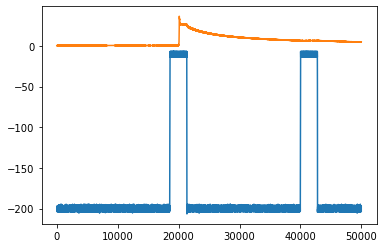

In [21]:
# choose 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM1.h5'
file = file_list[6]
filename = file.split('\\')[-1][:-3]
pklName = './data/shift_opts_freqs_all/' + filename + '.pkl'
shift_opts_freqs_all = pickle.load(open(pklName, 'rb')) 
h51 = h5py.File(file, "r")

print(filename)
print("ATTR:")
print(h51.attrs.keys())
print("Keys:")
print(h51.keys())
print("Points:")
print(h51['t'].shape)
print("shift_opts_freqs_all:")
print(shift_opts_freqs_all.shape)

plt.plot(h51['spd1'][:50000], label = 'spd')
plt.plot(h51['ip1k1'][:50000], label = 'ip1k1')
# plt.legend()

In [ ]:
h51['ip1k1']

In [24]:
x = 20200
h51['ip1k1'][x:x+100]

array([27.582123, 27.609495, 27.625431, 27.61954 , 27.593729, 27.5615  ,
       27.660173, 27.61509 , 27.613464, 27.6753  , 27.570564, 27.626093,
       27.633905, 27.646603, 27.647924, 27.57231 , 27.636763, 27.58598 ,
       27.617245, 27.661905, 27.557154, 27.654129, 27.575726, 27.573336,
       27.605642, 27.574642, 27.615047, 27.521076, 27.556839, 27.58835 ,
       27.515123, 27.611805, 27.627398, 27.531816, 27.513205, 27.615667,
       27.54316 , 27.478159, 27.49472 , 27.470036, 27.395773, 27.419943,
       27.42    , 27.297625, 27.278456, 27.31536 , 27.159061, 27.13489 ,
       27.174984, 27.2     , 27.146154, 26.986774, 26.946491, 26.967033,
       26.892889, 26.82896 , 26.886662, 26.773527, 26.816723, 26.793676,
       26.73063 , 26.69    , 26.69    , 26.667732, 26.632605, 26.60644 ,
       26.578981, 26.474245, 26.563053, 26.497023, 26.468678, 26.51246 ,
       26.439995, 26.431938, 26.442287, 26.403803, 26.355967, 26.406288,
       26.317663, 26.338852, 26.36    , 26.354824, 

In [4]:
low = np.where(h51['spd1'][:]>-50)[0]
# skip the lsa in first 10000 points because some wierd patterns in speed, 
# check 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5', 
if filename in ['20210127_Phase_A-D_LEM2']:
    low = low[low>10000]
pos_low = h51['pos1'][low]
low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
pos_low_sep = np.split(pos_low,low_sep+1)
Ls = np.append(low[low_sep],low[-1])
Fs = np.append(low[0],low[low_sep+1])
if filename in ["20210218_7_Phase_C-F_LEM1","20210218_7_Phase_C-F_LEM2"]:
    Ls = Ls[:-1]
    Fs = Fs[:-1]

In [12]:
pklName = './data/shift_opts_freqs_all/' + filename + '.pkl'
shift_opts_freqs_all = pickle.load(open(pklName, 'rb'))
shift_opts_freqs_all.shape

(121, 1069543)

## Training

In [13]:
N = 100 # ignore first N points
s21 = np.array(h51['S21_P1_LEM1'])
dataset = []
for j in range (121):
    index = np.arange(N,len(h51['t'])) - shift_opts_freqs_all[j,N:].round().astype(int)
    dataset.append(s21[index,j].real)
    dataset.append(s21[index,j].imag)
    
X = np.asarray(dataset).T
y = np.asarray(h51['ip1k1'][N:])
print("X:")
print(X.shape)
print("y:")
print(y.shape)

X:
(1069443, 242)
y:
(1069443,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10 ,min_samples_leaf=10 ,oob_score=True,random_state=42)
rf.fit(X_train_scaled, y_train) # trainig time for 10 trees: >2h
print("RandomForestRegressor, oob score:", rf.oob_score_)

RandomForestRegressor, oob score: 0.8300110398226828


In [27]:
# save the file
modelName = './models/rf_ip1k1_' + filename + '.pkl'
pickle.dump(rf, open(modelName, 'wb'))

In [21]:
# # load the model from disk
# modelName = './models/rf_ip1k1_' + filename + '.pkl'
# rf = pickle.load(open(modelName, 'rb'))

In [28]:
rf.score(X_test_scaled, y_test)

0.836252366210232

mean of the errors:  0.25194142308910156
median of the errors:  0.13999187105705668


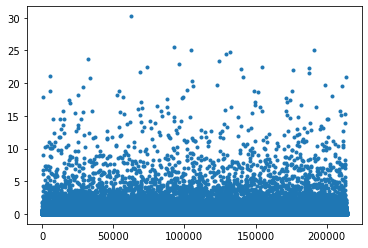

In [29]:
err = abs(rf.predict(X_test_scaled) - y_test)
print("mean of the errors: ", np.mean(err))
print("median of the errors: ", np.median(err))
plt.plot(err,'.')

No handles with labels found to put in legend.
<ipython-input-45-e44d153d548d>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.subplot(2, 1, 1)


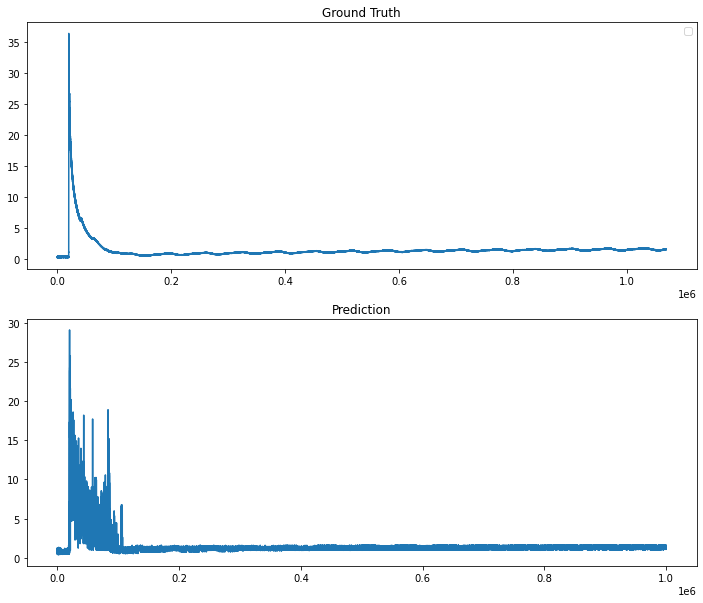

In [45]:
# predictioin vs ground truth
# X_ = scaler.fit_transform(X[:int(1e6)])
# y_ = rf.predict(X_)
%matplotlib inline
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.legend()
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(212, )
ax1.plot(y,label = 'ground truth')
ax1.title.set_text('Ground Truth')
ax2.plot(y_,label = 'predict')
ax2.title.set_text('Prediction')

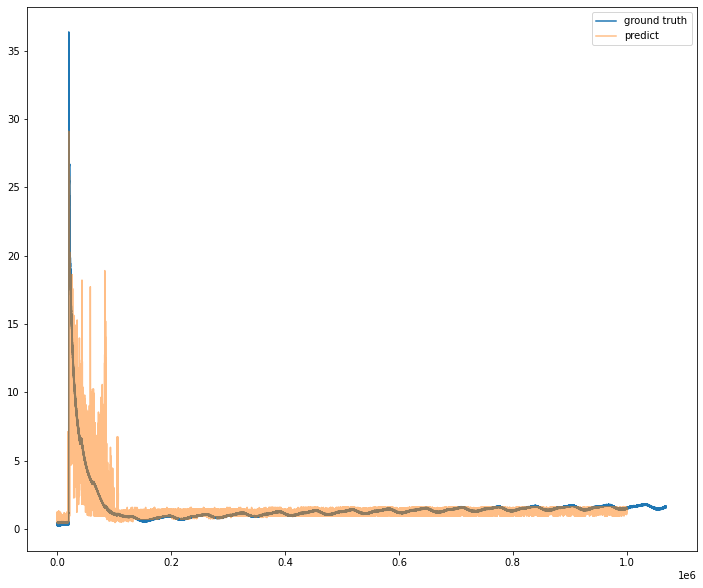

In [48]:
# predictioin vs ground truth in one plot
%matplotlib inline
fig = plt.figure(figsize =(12,10))
ax = fig.add_subplot(111)
ax.plot(y,label = 'ground truth')
ax.plot(y_, label = 'predict', alpha = 0.5)
plt.legend()

In [31]:
feature_lookup_rev = {}
for i in range(121*2):
    if i%2==0:
        feature_lookup_rev[i] = 's21-'+str(i//2)+'-real'
    else:
        feature_lookup_rev[i] = 's21-'+str(i//2)+'-imag' 

In [32]:
# feature ranking
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X_train_scaled.shape[1]):
    print("%d. feature %d, %s :(%f)" % 
          (i + 1, indices[i],feature_lookup_rev[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature 84, s21-42-real :(0.466820)
2. feature 68, s21-34-real :(0.128074)
3. feature 78, s21-39-real :(0.024458)
4. feature 77, s21-38-imag :(0.016406)
5. feature 64, s21-32-real :(0.014369)
6. feature 124, s21-62-real :(0.013534)
7. feature 138, s21-69-real :(0.012679)
8. feature 14, s21-7-real :(0.012370)
9. feature 161, s21-80-imag :(0.010671)
10. feature 71, s21-35-imag :(0.010232)
11. feature 63, s21-31-imag :(0.008888)
12. feature 120, s21-60-real :(0.006060)
13. feature 20, s21-10-real :(0.006007)
14. feature 127, s21-63-imag :(0.005905)
15. feature 38, s21-19-real :(0.005626)
16. feature 23, s21-11-imag :(0.005430)
17. feature 4, s21-2-real :(0.005272)
18. feature 215, s21-107-imag :(0.005199)
19. feature 174, s21-87-real :(0.005040)
20. feature 59, s21-29-imag :(0.004964)
21. feature 9, s21-4-imag :(0.004774)
22. feature 102, s21-51-real :(0.004648)
23. feature 3, s21-1-imag :(0.004556)
24. feature 224, s21-112-real :(0.004202)
25. feature 74, s21-37-real 

<IPython.core.display.Javascript object>


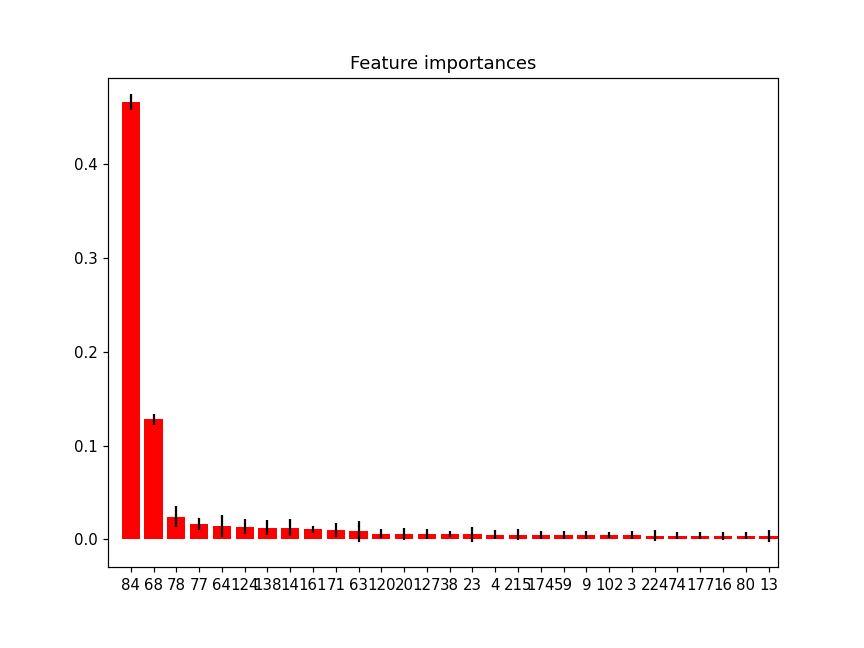

In [49]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Plot the impurity-based feature importances of the forest
%matplotlib nbagg
plt.figure(figsize = (8,6))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()